In [30]:
# Importing Libraries

# Data Handling
import pandas as pd
import numpy as np
from collections import defaultdict
from concurrent.futures import ThreadPoolExecutor

# Efficient Looping
import itertools

# Traceback for diagnosis
import traceback

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Statistics & Mathematics
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro, skew, anderson, kstest
import math

# Feature Selection
from sklearn.feature_selection import (
    RFECV, SelectKBest, chi2, f_classif, f_regression,
    mutual_info_classif, mutual_info_regression
)

# Machine Learning Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin,ClassifierMixin

# Preprocessing data
from sklearn.preprocessing import RobustScaler, StandardScaler, QuantileTransformer, FunctionTransformer

from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Model Selection for Cross Validation
from sklearn.model_selection import (
    StratifiedKFold, KFold, 
    RepeatedKFold, RepeatedStratifiedKFold,
    train_test_split, TimeSeriesSplit
)

# Machine Learning metrics
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    cohen_kappa_score,
    make_scorer,
    roc_curve,
    auc,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix
)

# ML regressors
from sklearn.linear_model import HuberRegressor,RANSACRegressor, TheilSenRegressor, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.ensemble import (
    HistGradientBoostingRegressor, StackingRegressor, 
    AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor,
    GradientBoostingRegressor, StackingRegressor, VotingRegressor
    )
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# ML classifiers
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import (
    HistGradientBoostingClassifier, AdaBoostClassifier, 
    RandomForestClassifier, GradientBoostingClassifier,
    StackingClassifier, VotingClassifier,ExtraTreesClassifier
    )
from sklearn.tree import DecisionTreeClassifier
# from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Clustering algorithms
from sklearn.cluster import KMeans

# Fine-tuning 
import optuna

# Randomizer
import random

# Encoder of categorical variables
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# OS
import os

# Image package
from PIL import Image

# Hiding warnings 
import warnings
warnings.filterwarnings("ignore")

In [31]:

# Importing Keras 
from keras.models import Sequential                          # Neural network model as a sequence of layers.
from keras.layers import Conv2D                              # Convolutional layer
from keras.layers import MaxPooling2D                        # Max pooling layer 
from keras.layers import Flatten                             # Layer used to flatten 2D arrays for fully-connected layers.
from keras.layers import Dense                               # This layer adds fully-connected layers to the neural network.
from keras.layers import Dropout                             # This serves to prevent overfitting by dropping out a random set of activations.
from keras.layers import BatchNormalization                  # This is used to normalize the activations of the neurons.
from keras.layers import Activation                          # Layer for activation functions
from keras.callbacks import EarlyStopping, ModelCheckpoint   # Classes used to save weights and stop training when improvements reach a limit
from keras.models import load_model                          # This helps us to load trained models
# Preprocessing layers
from keras.layers import Rescaling                           # This layer rescales pixel values

# Importing TensorFlow
import tensorflow as tf

In [32]:
paper_color = '#EEF6FF'
bg_color = '#EEF6FF'

In [33]:
def image_resizer(paths):
    """
    This function resizes the input images
    """
    with ThreadPoolExecutor() as executor:
        resized_images = list(executor.map(lambda x: Image.open(x).resize((350,250)), paths))
    return resized_images
def plot_images_list(images, title, subtitle):
    '''
    This functions helps to plot a matrix of images in a list
    '''
    fig = sp.make_subplots(rows=3, cols=3)
    images = image_resizer(images)
    
    traces = []
    for i in range(min(9, len(images))):
        img = go.Image(z=images[i])
        traces.append((img, i//3+1, i%3+1))
        
    fig.add_traces([trace[0] for trace in traces],
                  rows = [trace[1] for trace in traces],
                  cols = [trace[2] for trace in traces])

    fig.update_layout(
        title={'text': f'<b>{title}<br>  <i><sub>{subtitle}</sub></i></b>',
               'font': dict(size = 22)},
        height=800,
        width=800,
        margin=dict(t=110, l=80),
        plot_bgcolor=bg_color,paper_bgcolor=paper_color
        #template=template
    )
    fig.show()

In [34]:
import os

# Giving names to each directory
directories = {
    'train_dir': 'train',
    'test_dir': 'test'
    }

# Naming subfolders
subfolders = ['Avulsion fracture','Comminuted fracture','Fracture Dislocation',
                'Greenstick fracture','Hairline Fracture','Impacted fracture',
                'Longitudinal fracture','Oblique fracture','Pathological fracture',
                'Spiral Fracture']

print('\n* * * * * Number of files in each folder * * * * *\n')

# Counting the total of pictures inside each subfolder and directory
for name, dir  in directories.items():
    total = 0
    for sub in subfolders:
        path = os.path.join(dir, sub)
        num_files = len([f for f in os.listdir(path) if os.path.join(path, f)])
        total += num_files
        print(f'\n{name}/{sub}: {num_files}')
    print(f'\n  Total: {total}')
    print("-" * 80)


* * * * * Number of files in each folder * * * * *


train_dir/Avulsion fracture: 109

train_dir/Comminuted fracture: 134

train_dir/Fracture Dislocation: 137

train_dir/Greenstick fracture: 106

train_dir/Hairline Fracture: 101

train_dir/Impacted fracture: 75

train_dir/Longitudinal fracture: 68

train_dir/Oblique fracture: 69

train_dir/Pathological fracture: 116

train_dir/Spiral Fracture: 74

  Total: 989
--------------------------------------------------------------------------------

test_dir/Avulsion fracture: 14

test_dir/Comminuted fracture: 14

test_dir/Fracture Dislocation: 19

test_dir/Greenstick fracture: 16

test_dir/Hairline Fracture: 10

test_dir/Impacted fracture: 9

test_dir/Longitudinal fracture: 12

test_dir/Oblique fracture: 16

test_dir/Pathological fracture: 18

test_dir/Spiral Fracture: 12

  Total: 140
--------------------------------------------------------------------------------


In [35]:
unique_dimensions = set()

for name, dir in directories.items():
    for sub in subfolders:
        folder_path = os.path.join(dir, sub)
        
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            with Image.open(image_path) as img:
                unique_dimensions.add(img.size)
                
if len(unique_dimensions) == 1:
    print(f"\nAll images have the same dimensions: {unique_dimensions.pop()}")
else:
    print(f"\nFound {len(unique_dimensions)} unique image dimensions: {unique_dimensions}")


Found 642 unique image dimensions: {(224, 122), (408, 608), (150, 322), (551, 526), (275, 591), (199, 452), (89, 589), (267, 614), (160, 640), (465, 351), (536, 640), (262, 526), (207, 312), (285, 640), (468, 640), (210, 317), (564, 595), (187, 370), (234, 311), (212, 274), (282, 360), (166, 167), (498, 640), (91, 640), (612, 235), (342, 640), (210, 582), (494, 359), (364, 640), (179, 640), (144, 264), (337, 579), (249, 466), (315, 640), (395, 520), (182, 385), (215, 580), (339, 597), (311, 526), (300, 624), (528, 640), (121, 640), (256, 608), (449, 585), (277, 640), (218, 563), (453, 237), (176, 603), (293, 593), (585, 640), (251, 624), (262, 624), (334, 640), (636, 596), (239, 640), (640, 566), (274, 616), (122, 640), (221, 610), (400, 612), (181, 317), (597, 470), (307, 640), (306, 586), (296, 640), (640, 184), (190, 640), (578, 636), (454, 439), (303, 517), (378, 529), (258, 640), (392, 640), (640, 296), (288, 110), (555, 612), (209, 640), (134, 555), (607, 640), (410, 620), (539,

In [36]:
# Checking if all the images in the dataset have the same dimensions
dims_counts = defaultdict(int)

for name,dir in directories.items():
    for sub in subfolders:
        folder_path = os.path.join(dir, sub)
        
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            with Image.open(image_path) as img:
                dims_counts[img.size] += 1
                
for dimension, count in dims_counts.items():
    print(f"\nDimension {dimension}: {count} images")


Dimension (205, 586): 1 images

Dimension (172, 585): 1 images

Dimension (320, 640): 3 images

Dimension (245, 640): 1 images

Dimension (177, 640): 2 images

Dimension (219, 640): 3 images

Dimension (243, 640): 2 images

Dimension (468, 640): 1 images

Dimension (378, 622): 1 images

Dimension (640, 640): 380 images

Dimension (585, 640): 1 images

Dimension (593, 593): 1 images

Dimension (636, 596): 2 images

Dimension (635, 593): 1 images

Dimension (244, 640): 1 images

Dimension (213, 453): 1 images

Dimension (549, 576): 1 images

Dimension (283, 312): 1 images

Dimension (282, 360): 1 images

Dimension (612, 624): 1 images

Dimension (455, 580): 1 images

Dimension (395, 520): 1 images

Dimension (520, 620): 1 images

Dimension (608, 534): 1 images

Dimension (610, 619): 1 images

Dimension (542, 640): 2 images

Dimension (274, 570): 1 images

Dimension (208, 595): 1 images

Dimension (533, 640): 1 images

Dimension (313, 640): 1 images

Dimension (307, 640): 2 images

Dimen

In [37]:
# Checking images dtype
all_uint8 = True
all_in_range = True

for name, dir in directories.items():
    for sub in subfolders:
        folder_path = os.path.join(dir, sub)
        
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            with Image.open(image_path) as img:
                img_array = np.array(img)
                
            if img_array.dtype == 'uint8':
                all_uint8 = False
            
            if img_array.min() < 0 or img_array.max() > 255:
                all_in_range = False
                
if all_uint8:
    print(" - All images are of data type uint8\n")
else:
    print(" - Not all images are of data type uint8\n")
    
if all_in_range:
    print(" - All images have pixel values ranging from 0 to 255")
else:
    print(" - Not all images have the same pixel values from 0 to 255")

 - Not all images are of data type uint8

 - All images have pixel values ranging from 0 to 255


In [38]:
import random

train_dir = 'train'

# Loading the directory for each class in the training dataset
train_list =[]
for sub in subfolders:
    train_list.append(train_dir+'/'+sub)

files_dict = {}
# Selecting 9 random pictures from each directory
for path in train_list:
    files_dict[path] = random.sample(os.listdir(path), 9)

In [39]:

# Plotting healthy plants
# for path in files_dict:
#     images = [os.path.join(path, f) for f in files_dict[path]]
#     plot_images_list(images, path, "Training Dataset")

In [40]:
seed = 42
# Creating a Dataset for the Training data
train = tf.keras.utils.image_dataset_from_directory(
    train_dir,  # Directory where the Training images are located
    labels = 'inferred', # Classes will be inferred according to the structure of the directory
    label_mode = 'categorical',
    class_names = subfolders,
    batch_size = 16,    # Number of processed samples before updating the model's weights
    image_size = (256, 256), # Defining a fixed dimension for all images
    shuffle = True,  # Shuffling data
    seed = seed,  # Random seed for shuffling and transformations
    validation_split = 0, # We don't need to create a validation set from the training set
    crop_to_aspect_ratio = True # Resize images without aspect ratio distortion
)

Found 989 files belonging to 10 classes.


In [41]:
test_dir = 'test'
# Creating a dataset for the Test data
test = tf.keras.utils.image_dataset_from_directory(
    test_dir,  
    labels = 'inferred', 
    label_mode = 'categorical',
    class_names = subfolders,
    batch_size = 16,    
    image_size = (256, 256), 
    shuffle = True,  
    seed = seed,  
    validation_split = 0, 
    crop_to_aspect_ratio = True 
)

Found 140 files belonging to 10 classes.


In [42]:
print('\nTraining Dataset:', train)
print('\nTesting Dataset:', test)


Training Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

Testing Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>


In [43]:
len(test)

9

In [44]:
# Checking minimum and maximum pixel values in the Validation dataset
min_value = float('inf')
max_value = -float('inf')

for img, label in train:
    batch_min = tf.reduce_min(img)
    batch_max = tf.reduce_max(img)
    
    min_value = min(min_value, batch_min.numpy())
    max_value = max(max_value, batch_max.numpy())
    
print('\nMinimum pixel value in the Validation dataset', min_value)
print('\nMaximum pixel value in the Validation dataset', max_value)


Minimum pixel value in the Validation dataset 0.0

Maximum pixel value in the Validation dataset 255.0


In [45]:
scaler = Rescaling(1./255) # Defining scaler values between 0 to 1

In [46]:
# Rescaling datasets
train = train.map(lambda x, y: (scaler(x), y)) 
test = test.map(lambda x, y: (scaler(x), y))

In [47]:
# Checking minimum and maximum pixel values in the Validation dataset
min_value = float('inf')
max_value = -float('inf')

for img, label in train:
    batch_min = tf.reduce_min(img)
    batch_max = tf.reduce_max(img)
    
    min_value = min(min_value, batch_min.numpy())
    max_value = max(max_value, batch_max.numpy())
    
print('\nMinimum pixel value in the Validation dataset', min_value)
print('\nMaximum pixel value in the Validation dataset', max_value)


Minimum pixel value in the Validation dataset 0.0

Maximum pixel value in the Validation dataset 1.0


In [48]:
# Creating data augmentation pipeline
augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(
        factor = (-.25, .3),
        fill_mode = 'reflect',
        interpolation = 'bilinear',
        seed = seed),
        
        
        tf.keras.layers.RandomBrightness(
        factor = (-.45, .45),
        value_range = (0.0, 1.0),
        seed = seed),
        
        tf.keras.layers.RandomContrast(
        factor = (.5),
        seed = seed)
    ]
)

In [49]:
augmentation.build((None, 256, 256, 3)) # Building model
# Plotting model
tf.keras.utils.plot_model(augmentation,
                          show_shapes = True,
                          show_layer_names = True,
                          expand_nested = True
                        )

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [50]:
augmentation.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_1 (RandomR  (None, 256, 256, 3)       0         
 otation)                                                        
                                                                 
 random_brightness_1 (Rando  (None, 256, 256, 3)       0         
 mBrightness)                                                    
                                                                 
 random_contrast_1 (RandomC  (None, 256, 256, 3)       0         
 ontrast)                                                        
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
# Initiating model on GPU
# with strategy.scope():
model = Sequential()

model.add(augmentation) # Adding data augmentation pipeline to the model

# Feature Learning Layers
model.add(Conv2D(32,                  # Number of filters/Kernels
                    (3,3),               # Size of kernels (3x3 matrix)
                    strides = 1,         # Step size for sliding the kernel across the input (1 pixel at a time).
                    padding = 'same',    # 'Same' ensures that the output feature map has the same dimensions as the input by padding zeros around the input. 
                input_shape = (256,256,3) # Input image shape
                ))
model.add(Activation('relu'))# Activation function
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5,5), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv2D(256, (5,5), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

# Flattening tensors
model.add(Flatten())

# Fully-Connected Layers
model.add(Dense(2048))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(len(subfolders), activation = 'softmax')) # Classification layer

In [52]:
# Compiling model
model.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001), # 1e-4
              loss = 'categorical_crossentropy', # Ideal for multiclass tasks
              metrics = ['accuracy']) # Evaluation metric

In [53]:
# Defining an Early Stopping and Model Checkpoints
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                              patience = 5, mode = 'max',
                              restore_best_weights = True)

checkpoint = ModelCheckpoint('best_model.h5',
                            monitor = 'val_accuracy',
                            save_best_only = True)

In [55]:
# Training and Testing Model
try:
    history = model.fit(
        train, epochs = 50,
        validation_data = test,
        callbacks = [early_stopping, checkpoint])
except Exception as e:
    print("An error occurred:", e)

Epoch 1/50


62/62 [==============================] - 58s 937ms/step - loss: 7.3804 - accuracy: 0.1294 - val_loss: 5.2828 - val_accuracy: 0.0857
Epoch 2/50
62/62 [==============================] - 61s 975ms/step - loss: 4.4272 - accuracy: 0.1223 - val_loss: 4.1854 - val_accuracy: 0.0857
Epoch 3/50
62/62 [==============================] - 58s 937ms/step - loss: 2.7844 - accuracy: 0.1284 - val_loss: 7.8501 - val_accuracy: 0.0857
Epoch 4/50
62/62 [==============================] - 58s 925ms/step - loss: 2.5571 - accuracy: 0.1274 - val_loss: 4.5783 - val_accuracy: 0.0929
Epoch 5/50
62/62 [==============================] - 57s 919ms/step - loss: 2.4491 - accuracy: 0.1335 - val_loss: 7.3080 - val_accuracy: 0.0857
Epoch 6/50
62/62 [==============================] - 57s 923ms/step - loss: 2.4211 - accuracy: 0.1294 - val_loss: 5.3404 - val_accuracy: 0.1071
Epoch 7/50
62/62 [==============================] - 57s 919ms/step - loss: 2.4026 - accuracy: 0.1234 - val_loss: 5.3053 - val_accuracy: 0.1214
Epoch 8/50

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 256, 256, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)     

In [57]:
# Creating subplot
fig = make_subplots(rows=1,
                    cols=2,
                    subplot_titles=['<b>Loss Over Epochs</b>', '<b>Accuracy Over Epochs</b>'],
                    horizontal_spacing=0.2)

# Loss over epochs
train_loss = go.Scatter(x=list(range(len(history.history['loss']))),
                        y=history.history['loss'],
                        mode='lines',
                        line=dict(color='rgba(0, 67, 162, .75)', width=4.75),
                        name='Training',
                        showlegend = False)

val_loss = go.Scatter(x=list(range(len(history.history['val_loss']))),
                      y=history.history['val_loss'],
                      mode='lines',
                      line=dict(color='rgba(255, 132, 0, .75)', width=4.75),
                      name='Test',
                      showlegend = False)


fig.add_trace(train_loss, row=1, col=1)
fig.add_trace(val_loss, row=1, col=1)

# Accuray over epochs
train_acc = go.Scatter(x=list(range(len(history.history['accuracy']))),
                       y=history.history['accuracy'],
                       mode='lines',
                       line=dict(color='rgba(0, 67, 162, .75)', width=4.75),
                       name='Training',
                       showlegend = True)

val_acc = go.Scatter(x=list(range(len(history.history['val_accuracy']))),
                     y=history.history['val_accuracy'],
                     mode='lines',
                     line=dict(color='rgba(255, 132, 0, .75)', width=4.75),
                     name='Test',
                     showlegend = True)


fig.add_trace(train_acc, row=1, col=2)
fig.add_trace(val_acc, row=1, col=2)

# Updating layout
fig.update_layout(
    title={'text': '<b>Loss and Accuracy Over Epochs</b>', 'x': 0.025, 'xanchor': 'left'},
    margin=dict(t=100),
    plot_bgcolor=bg_color,paper_bgcolor=paper_color,
    height=500, width=1000,
    showlegend= True
)

fig.update_yaxes(title_text = 'Loss', row = 1, col = 1)
fig.update_yaxes(title_text = 'Accuracy', row = 1, col = 2)

fig.update_xaxes(title_text = 'Epoch', row = 1, col = 1)
fig.update_xaxes(title_text = 'Epoch', row = 1, col = 2)

# Showing figure
fig.show()

In [58]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
# Loading best weights
model.load_weights('best_model.h5')

In [59]:
preds = model.predict(test)  # Running model on the validation dataset
val_loss, val_acc = model.evaluate(test) # Obtaining Loss and Accuracy on the val dataset

print('\nValidation Loss: ', val_loss)
print('\nValidation Accuracy: ', np.round(val_acc * 100), '%')

9/9 [==============================] - 1s 146ms/step - loss: 5.0790 - accuracy: 0.1429

Validation Loss:  5.079010009765625

Validation Accuracy:  14.0 %


Picture of a Avulsion fracture: 



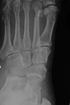

In [62]:
image_path = 'test/Avulsion fracture/1-s2-0-S0899707114002836-gr2_jpg.rf.bb8ed4dee892edbb760f6ce687d74ba5.jpg'
original_image = Image.open(image_path)
og_width, og_height = original_image.size

# Resizing image for optimal performance
new_width = int(og_width * .20) # 20% of the original size
new_height = int(og_height * .20) # 20% of the original size

resized_img = original_image.resize((new_width, new_height))
print('Picture of a Avulsion fracture: \n')
resized_img

In [63]:
# Manually preprocessing image
preprocessed_image = original_image.resize((256, 256))
preprocessed_image = np.array(preprocessed_image) / 255.0

preds = model.predict(np.expand_dims(preprocessed_image, axis = 0))
labels = subfolders

preds_class = np.argmax(preds)
preds_label = labels[preds_class]

print(f'\nPredicted Class: {preds_label}')
print(f'\nConfidence Score: {preds[0][preds_class]}')

1/1 [==============================] - 0s 220ms/step

Predicted Class: Fracture Dislocation

Confidence Score: 0.9039558172225952


In [64]:
model.save('bone_fracture_classifier_v1.h5')

In [ ]:
#%pip install pydot_ng

In [ ]:
#%pip install pydot

In [ ]:
%pip list

In [ ]:
import tensorflow.compat

In [ ]:
#%pip install jax==0.4.28
%pip install jax==0.5.1
# %pip install keras==2.14.0
# %pip install tensorflow.compat==2.16.1
